In [8]:
import bilby
import numpy as np
import dill
import os

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
def load_hybrid_data(rundir, result_prefix, dpi, extra_label=None):
    resultdir = os.path.join(rundir, "result")

    if extra_label is None:
        result_path = os.path.join(resultdir, "%s_%s_result.json" % (result_prefix, dpi))
        resume_path = os.path.join(resultdir, "%s_%s_checkpoint_resume.pickle" % (result_prefix, dpi))
    else:
        result_path = os.path.join(resultdir, "%s_%s_%s_result.json" % (result_prefix, dpi, extra_label))
        resume_path = os.path.join(resultdir, "%s_%s_%s_checkpoint_resume.pickle" % (result_prefix, dpi, extra_label))
    
    result = bilby.core.result.read_in_result(result_path) if os.path.isfile(result_path) else None
    
    with open(resume_path, 'rb') as f:
        resume = dill.load(f)
        
    return result, resume

In [3]:
def load_nest_data(rundir, result_prefix):
    result_path = os.path.join(
        rundir, "result",
        "%s_result.json" % result_prefix
    )

    result = bilby.core.result.read_in_result(result_path) if os.path.isfile(result_path) else None
    return result

In [6]:
dphi = ["d_phi_0", "d_phi_1", "d_phi_2", "d_phi_3", "d_phi_4", "d_phi_5L", "d_phi_6", "d_phi_6L", "d_phi_7"]
dalpha = ["d_alpha_2", "d_alpha_3", "d_alpha_4"]
dbeta = ["d_beta_2", "d_beta_3"]

dpi = dphi + dalpha + dbeta

# GW150914

In [7]:
gw150914_rundir = "/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/"
gw150914_prefix =  "hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty"

gw_resume_data = []

for i,d in tqdm(enumerate(dpi)):
    _, gw_hybrid_resume = load_hybrid_data(
        gw150914_rundir, 
        gw150914_prefix,
        d
    )

    gw_resume_data.append(gw_hybrid_resume)

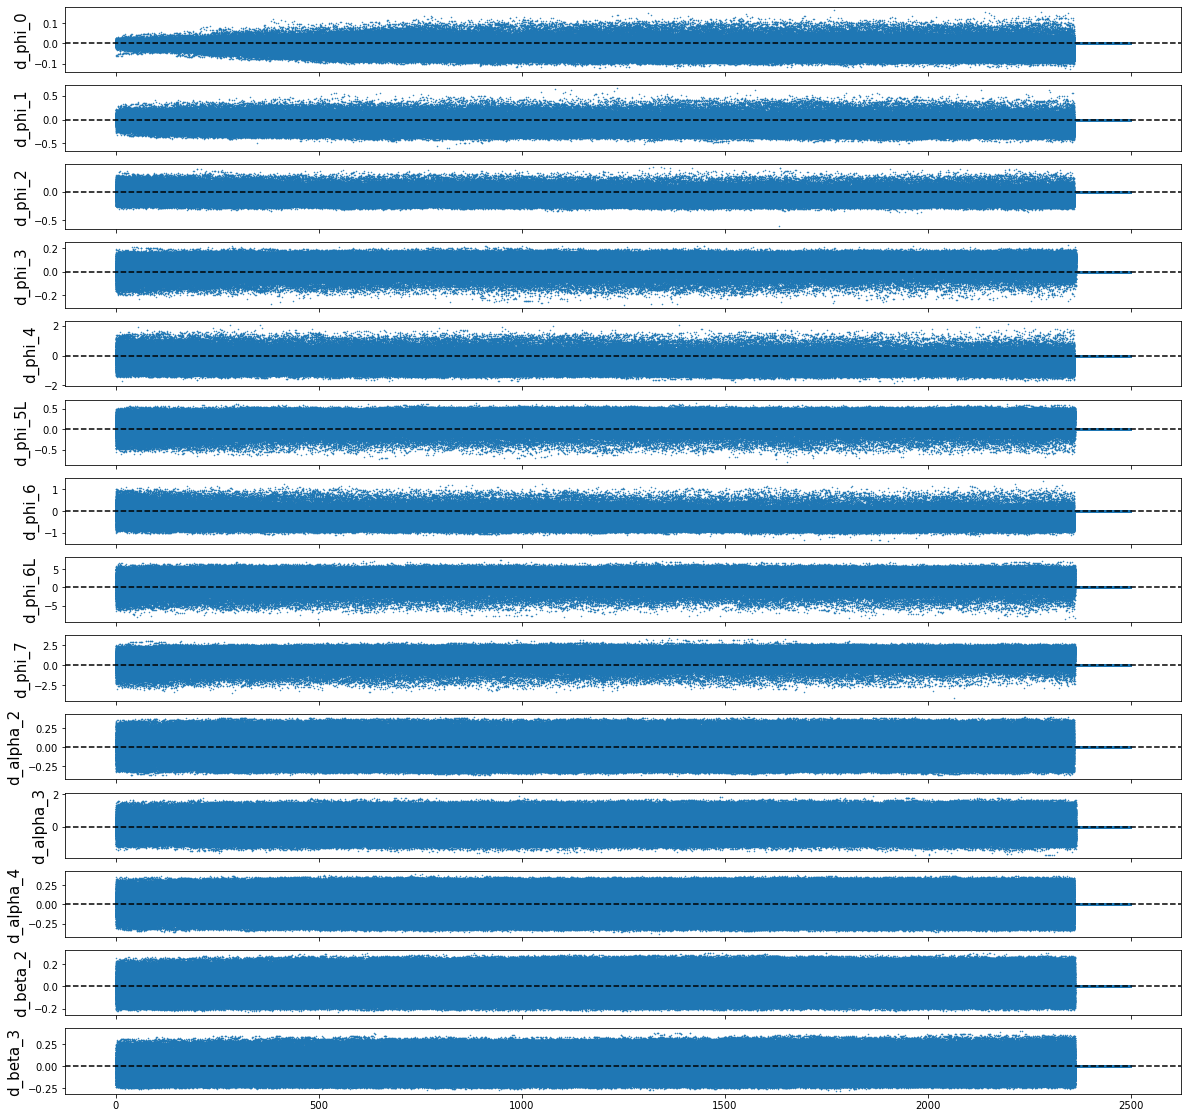

In [25]:
fig, axes = plt.subplots(nrows=14, sharex=True, figsize=(20,20))

for i,ax in enumerate(axes.flat):
    ax.plot(
        np.arange(0,2500,1), gw_resume_data[i]["chain_array"][:,:,12].T, linestyle="", marker="o", markersize=0.5, color="C0"
    )

    ax.set_ylabel(dpi[i], fontsize=15)

    ax.axhline(y=0, linestyle="--", color="black")

# High SNR Injection

In [26]:
highsnr_rundir = "/home/noah.wolfe/MA499_report_runs/injected/beyond-gr/SNR/beyond-gr_d_phi_2-2E-01_dL-100/beyond-gr_d_phi_2-2E-01_dL-100_hybrid"

highsnr_resume_data = []

for i,d in tqdm(enumerate(dpi)):
    _, highsnr_hybrid_resume = load_hybrid_data(
        highsnr_rundir, 
        "beyond-gr_d_phi_2-2E-01_dL-100_hybrid_data0_0-0_analysis_H1L1_dynesty",
        d
    )

    highsnr_resume_data.append(highsnr_hybrid_resume)

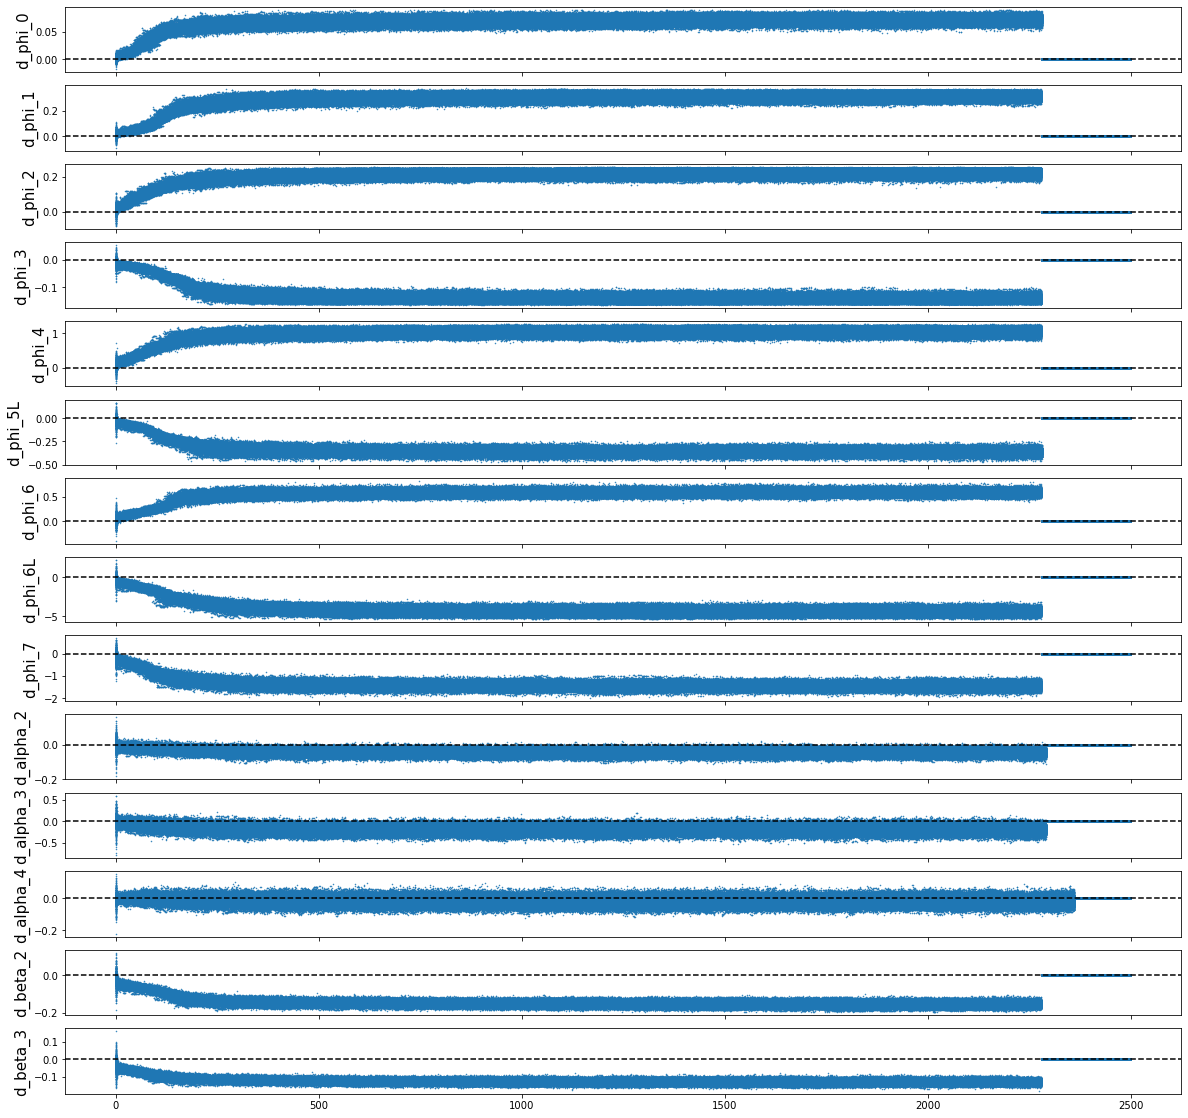

In [30]:
fig, axes = plt.subplots(nrows=14, sharex=True, figsize=(20,20))

for i,ax in enumerate(axes.flat):
    ax.plot(
        np.arange(0,2500,1), highsnr_resume_data[i]["chain_array"][:,:,10].T, linestyle="", marker="o", markersize=0.5, color="C0"
    )

    ax.set_ylabel(dpi[i], fontsize=15)

    ax.axhline(y=0, linestyle="--", color="black")

# Low SNR Injection

In [27]:
lowsnr_rundir = "/home/noah.wolfe/MA499_report_runs/injected/beyond-gr/SNR/beyond-gr_d_phi_2-2E-01_dL-1000/beyond-gr_d_phi_2-2E-01_dL-1000_hybrid"

lowsnr_resume_data = []

for i,d in tqdm(enumerate(dpi)):
    _, lowsnr_hybrid_resume = load_hybrid_data(
        lowsnr_rundir, 
        "beyond-gr_d_phi_2-2E-01_dL-1000_hybrid_data0_0-0_analysis_H1L1_dynesty",
        d
    )

    lowsnr_resume_data.append(lowsnr_hybrid_resume)

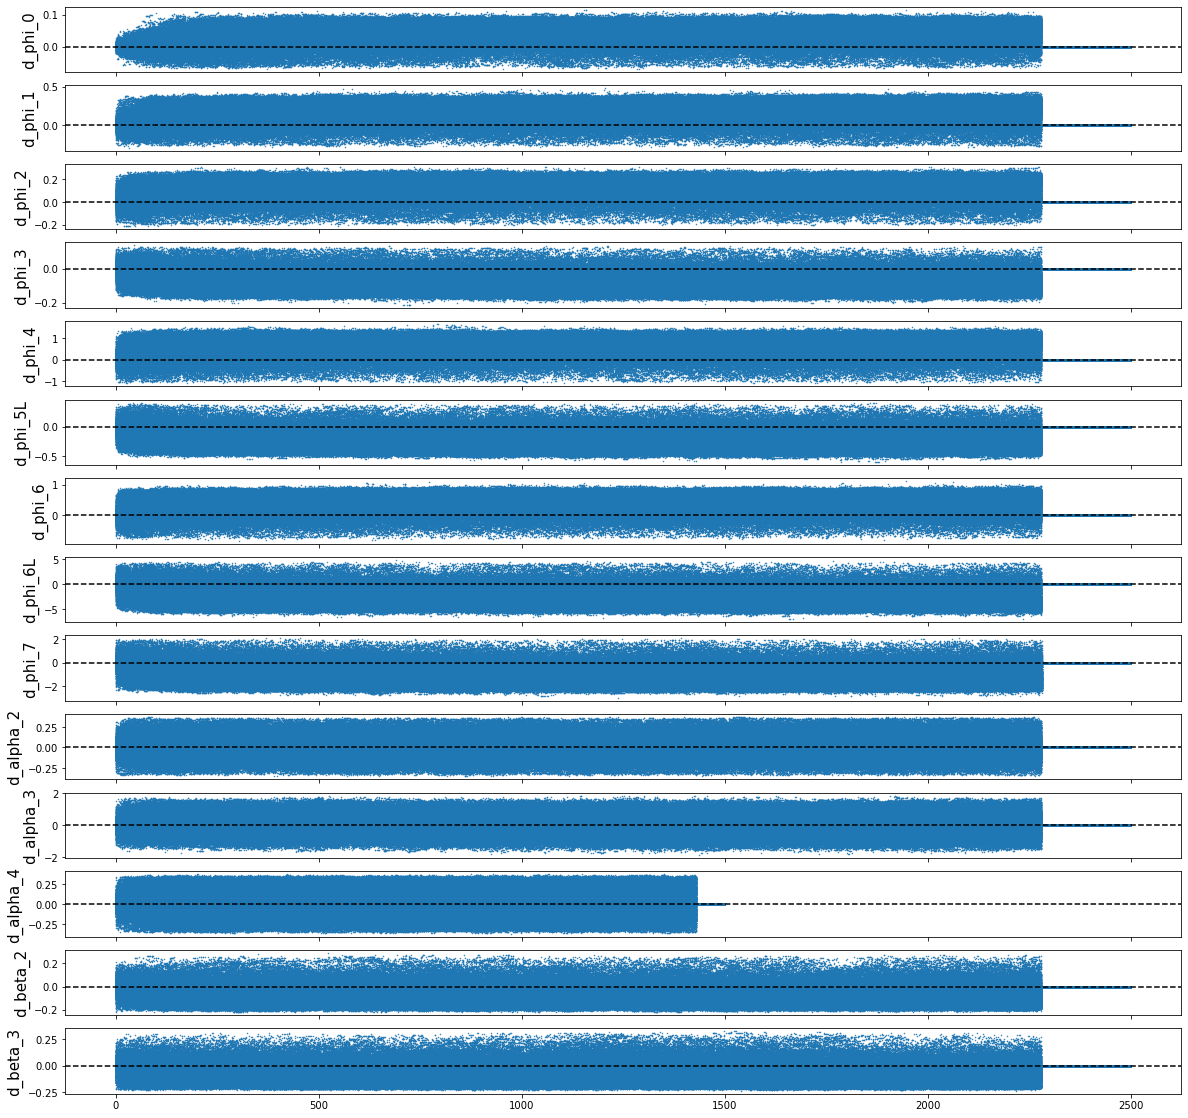

In [32]:
fig, axes = plt.subplots(nrows=14, sharex=True, figsize=(20,20))

for i,ax in enumerate(axes.flat):
    nchain = lowsnr_resume_data[i]["chain_array"][:,:,10].shape[1]
    ax.plot(
        np.arange(0,nchain,1), lowsnr_resume_data[i]["chain_array"][:,:,10].T, linestyle="", marker="o", markersize=0.5, color="C0"
    )

    ax.set_ylabel(dpi[i], fontsize=15)

    ax.axhline(y=0, linestyle="--", color="black")